<a href="https://colab.research.google.com/github/Lasata-T/Group1Project2/blob/main/Final_P2_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from datetime import date, timedelta
import matplotlib.dates as mdates
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
# Data Source 1: https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_00

In [ ]:
# Data Source 2: https://covid.cdc.gov/covid-data-tracker/#trends_weeklydeaths_select_00

In [ ]:
# MUST save above .csv files to local computer in order to upload into script

uploaded = files.upload()

Saving weekly_hospital.csv to weekly_hospital (1).csv


In [ ]:
df = pd.read_csv('weekly_hospital.csv') # replace name in quotes to whatever you have named the file locally
print(df)

         Geography         Date  Weekly COVID-19 Hospital Admissions
0    United States  Feb 17 2024                              18977.0
1    United States  Feb 10 2024                              20129.0
2    United States  Feb  3 2024                              21212.0
3    United States  Jan 27 2024                              23297.0
4    United States  Jan 20 2024                              25979.0
..             ...          ...                                  ...
210  United States  Feb  8 2020                                  NaN
211  United States  Feb  1 2020                                  NaN
212  United States  Jan 25 2020                                  NaN
213  United States  Jan 18 2020                                  NaN
214  United States  Jan 11 2020                                  NaN

[215 rows x 3 columns]


In [ ]:
df_new = df.dropna()
df_new

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Feb 17 2024,18977.0
1,United States,Feb 10 2024,20129.0
2,United States,Feb 3 2024,21212.0
3,United States,Jan 27 2024,23297.0
4,United States,Jan 20 2024,25979.0
...,...,...,...
180,United States,Sep 5 2020,26462.0
181,United States,Aug 29 2020,28194.0
182,United States,Aug 22 2020,29424.0
183,United States,Aug 15 2020,29869.0


In [ ]:
uploaded2 = files.upload()

Saving weekly_deaths.csv to weekly_deaths (1).csv


In [ ]:
df2 = pd.read_csv('weekly_deaths.csv')
print(df2)

         Geography         Date  Weekly Deaths Death Data As Of
0    United States  Feb 17 2024            526      Feb 22 2024
1    United States  Feb 10 2024           1129      Feb 22 2024
2    United States  Feb  3 2024           1398      Feb 22 2024
3    United States  Jan 27 2024           1883      Feb 22 2024
4    United States  Jan 20 2024           2210      Feb 22 2024
..             ...          ...            ...              ...
210  United States  Feb  8 2020              4      Feb 22 2024
211  United States  Feb  1 2020              0      Feb 22 2024
212  United States  Jan 25 2020              3      Feb 22 2024
213  United States  Jan 18 2020              2      Feb 22 2024
214  United States  Jan 11 2020              1      Feb 22 2024

[215 rows x 4 columns]


In [ ]:
df2_new = df2.fillna(0)
df2_new

,Geography,Date,Weekly Deaths,Death Data As Of
0,United States,Feb 17 2024,526,Feb 22 2024
1,United States,Feb 10 2024,1129,Feb 22 2024
2,United States,Feb 3 2024,1398,Feb 22 2024
3,United States,Jan 27 2024,1883,Feb 22 2024
4,United States,Jan 20 2024,2210,Feb 22 2024
...,...,...,...,...
210,United States,Feb 8 2020,4,Feb 22 2024
211,United States,Feb 1 2020,0,Feb 22 2024
212,United States,Jan 25 2020,3,Feb 22 2024
213,United States,Jan 18 2020,2,Feb 22 2024


In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%b %d %Y')
df2_new['Date'] = pd.to_datetime(df2_new['Date'], format='%b %d %Y')

df_merged = pd.merge(df_new, df2_new, on=['Date', 'Geography'], how='inner', suffixes=('_admissions', '_deaths'))


df_merged

<ipython-input-50-d9961e412bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%b %d %Y')


,Geography,Date,Weekly COVID-19 Hospital Admissions,Weekly Deaths,Death Data As Of
0,United States,2024-02-17,18977.0,526,Feb 22 2024
1,United States,2024-02-10,20129.0,1129,Feb 22 2024
2,United States,2024-02-03,21212.0,1398,Feb 22 2024
3,United States,2024-01-27,23297.0,1883,Feb 22 2024
4,United States,2024-01-20,25979.0,2210,Feb 22 2024
...,...,...,...,...,...
180,United States,2020-09-05,26462.0,5010,Feb 22 2024
181,United States,2020-08-29,28194.0,5739,Feb 22 2024
182,United States,2020-08-22,29424.0,6374,Feb 22 2024
183,United States,2020-08-15,29869.0,7248,Feb 22 2024


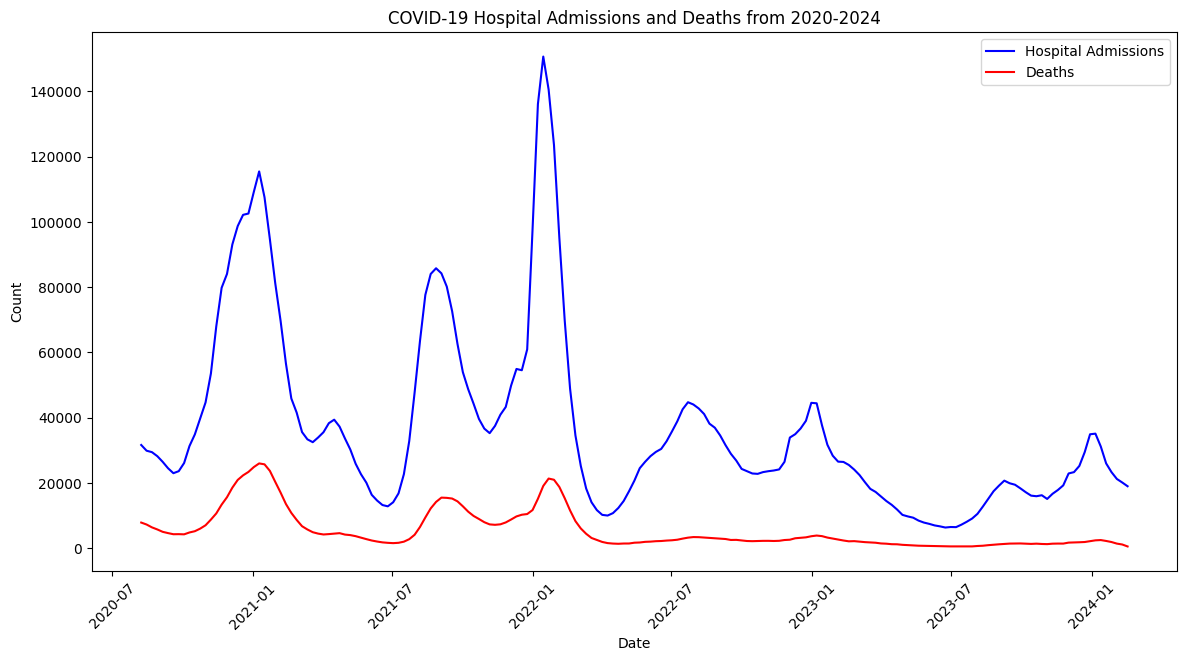

In [ ]:
plt.figure(figsize=(14, 7))

# Plotting Weekly COVID-19 Hospital Admissions
plt.plot(df_merged['Date'], df_merged['Weekly COVID-19 Hospital Admissions'], label='Hospital Admissions', color='blue')
plt.xlabel('Date')
plt.xticks(rotation=45)

# Plotting Weekly COVID-19 Deaths
plt.plot(df_merged['Date'], df_merged['Weekly Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.title('COVID-19 Hospital Admissions and Deaths from 2020-2024')
plt.legend()
plt.show()

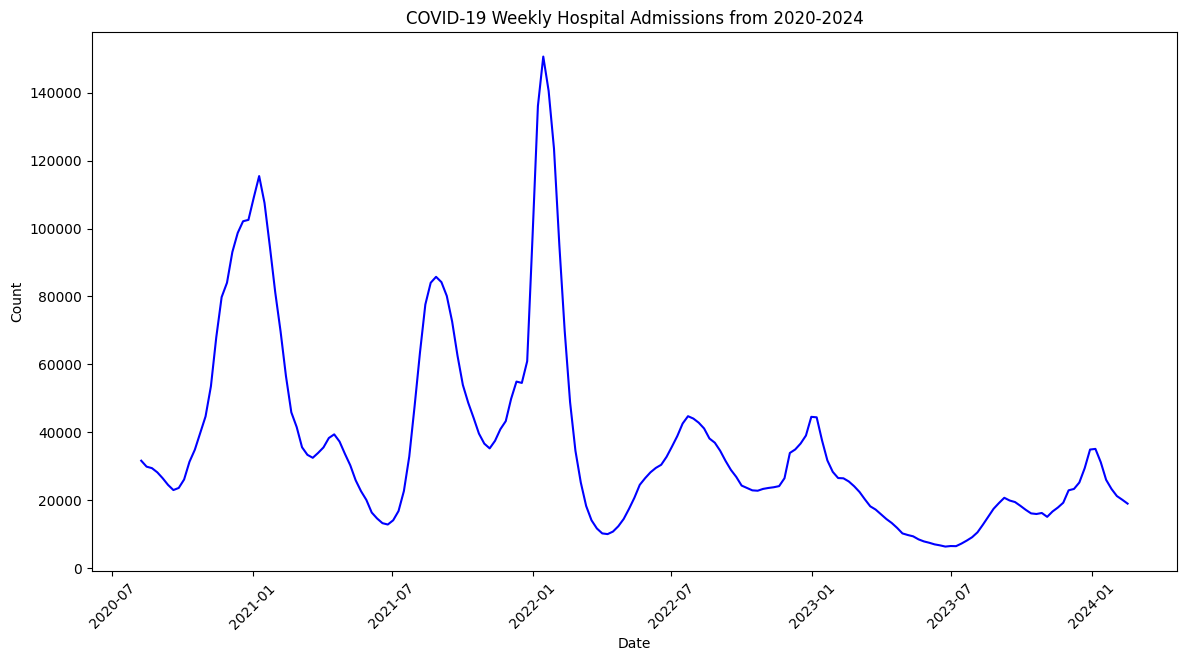

In [ ]:
# EDA plots --> splitting up the above graph
plt.figure(figsize=(14, 7))

# Plotting Weekly COVID-19 Hospital Admissions
plt.plot(df_merged['Date'], df_merged['Weekly COVID-19 Hospital Admissions'], label='Hospital Admissions', color='blue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('COVID-19 Weekly Hospital Admissions from 2020-2024')
plt.show()

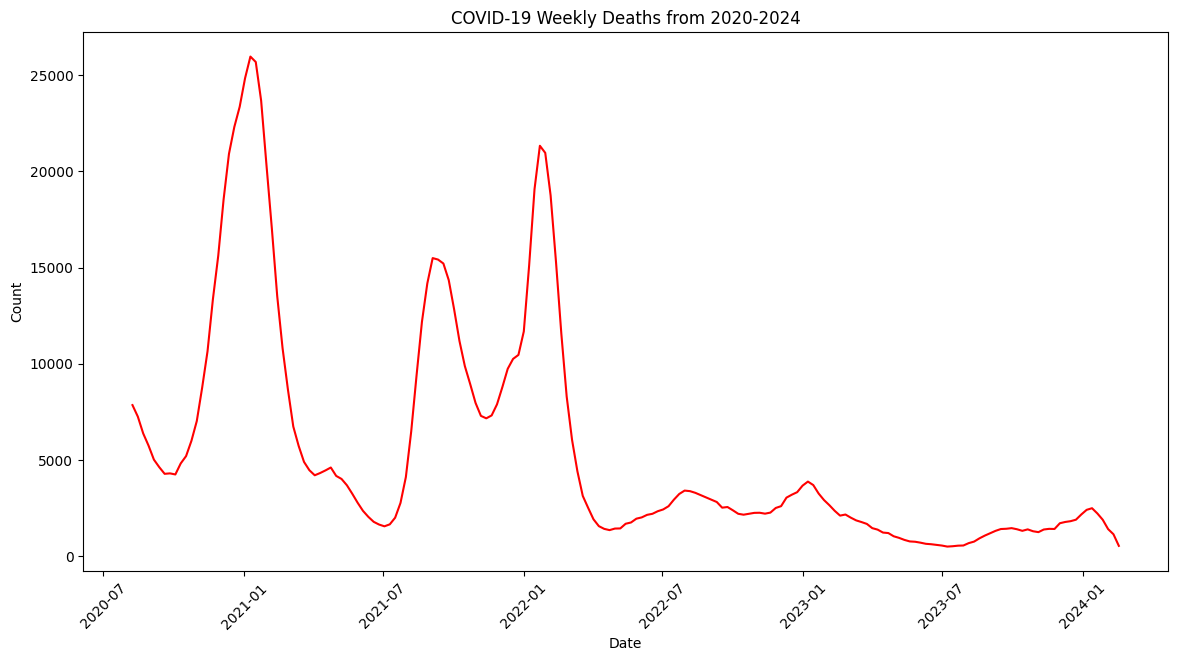

In [ ]:
# Plotting Weekly COVID-19 Deaths
plt.figure(figsize=(14, 7))

plt.plot(df_merged['Date'], df_merged['Weekly Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('COVID-19 Weekly Deaths from 2020-2024')
plt.show()

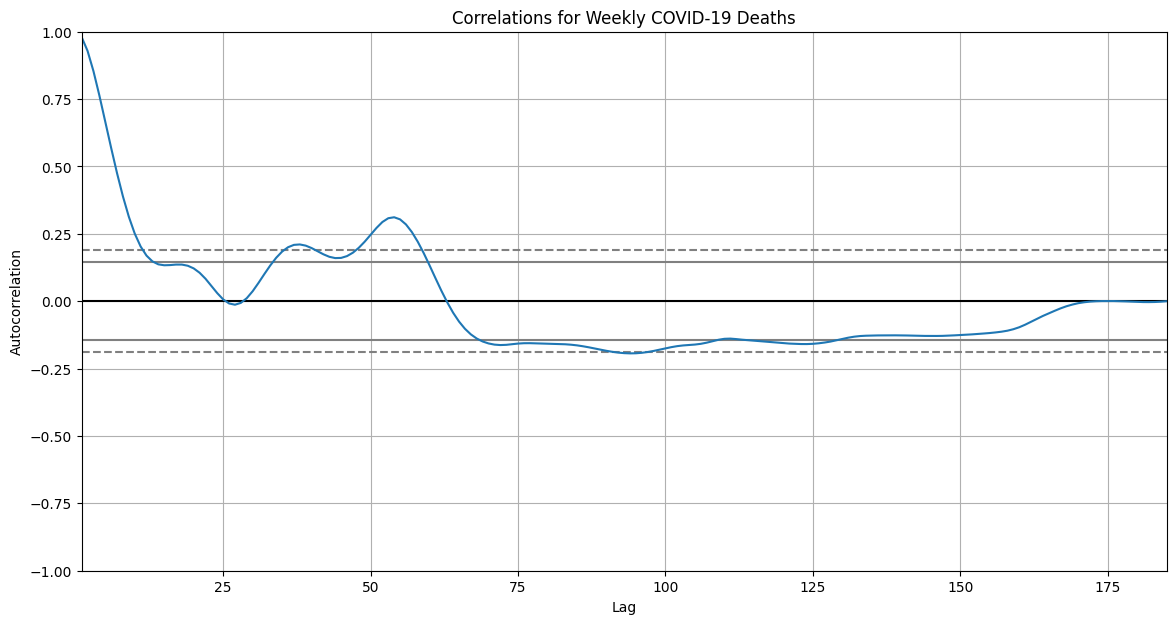

In [ ]:
# Time-Series Forecasting with weekly_deaths.csv

# 'AR' part of ARIMA
plt.figure(figsize=(14, 7))

autocorrelation_plot(df_merged['Weekly Deaths'])
plt.title('Correlations for Weekly COVID-19 Deaths')
plt.show()
# between 0 - 30 --> first section of positive correlation --> most drastic from 0 - approx. 13

In [ ]:
# Second Part of Research Question
model = ARIMA(df_merged['Weekly Deaths'], order=(13,1,1))
model_fit = model.fit()

In [ ]:
# Summary of Fit Model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Weekly Deaths   No. Observations:                  185
Model:                ARIMA(13, 1, 1)   Log Likelihood               -1342.859
Date:                Tue, 19 Mar 2024   AIC                           2715.717
Time:                        17:02:18   BIC                           2763.941
Sample:                             0   HQIC                          2735.263
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2246      0.792      1.545      0.122      -0.328       2.778
ar.L2         -0.2017      1.152     -0.175      0.861      -2.460       2.056
ar.L3         -0.4700      0.435     -1.081      0.2

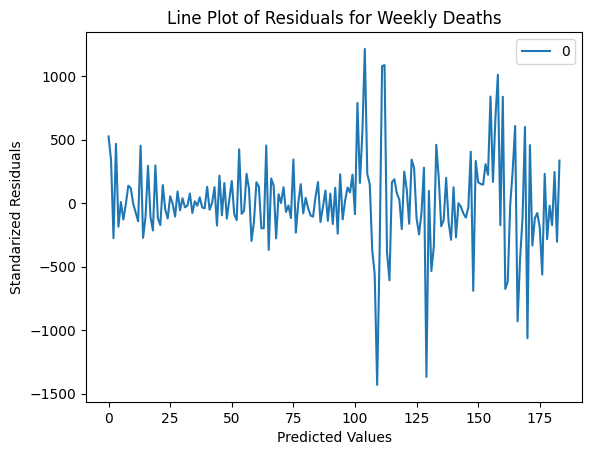

In [ ]:
# Line Plot of Residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.title('Line Plot of Residuals for Weekly Deaths')
plt.xlabel('Predicted Values')
plt.ylabel('Standarized Residuals')
plt.show()

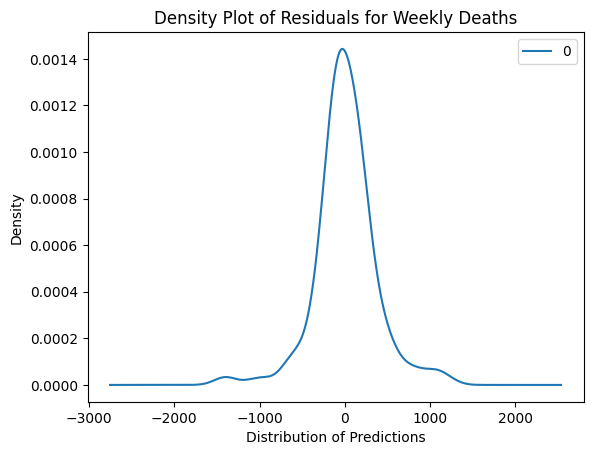

In [ ]:
# Density Plot of Residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals for Weekly Deaths')
plt.xlabel('Distribution of Predictions')
plt.show()
# errors are Gaussian, centered on zero

In [ ]:
# Summary Stats. of Residuals
print(residuals.describe())

                 0
count   185.000000
mean     12.667151
std     357.777859
min   -1434.560139
25%    -143.149473
50%      -9.745648
75%     167.465833
max    1214.280030


In [ ]:
# Rolling Forecasting

# split into train and test sets
X = df_merged['Weekly Deaths'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# Walk-forward Validation
for t in range(len(test)):
 model = ARIMA(history, order=(13,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=10226.624951, expected=9878.000000
predicted=10707.351391, expected=11180.000000
predicted=12547.849689, expected=12830.000000
predicted=14375.550626, expected=14347.000000
predicted=15291.857506, expected=15211.000000
predicted=15427.112295, expected=15417.000000
predicted=15201.186222, expected=15493.000000
predicted=15569.127847, expected=14174.000000
predicted=11831.307244, expected=12181.000000
predicted=10253.270792, expected=9406.000000
predicted=6850.412525, expected=6484.000000
predicted=3764.824142, expected=4105.000000
predicted=2673.084870, expected=2760.000000
predicted=2464.523845, expected=1991.000000
predicted=1714.514534, expected=1645.000000
predicted=1510.291593, expected=1543.000000
predicted=1878.944056, expected=1635.000000
predicted=2096.943708, expected=1776.000000
predicted=2033.072118, expected=2035.000000
predicted=2696.224987, expected=2347.000000
predicted=2793.779152, expected=2770.000000
predicted=3352.903040, expected=3238.000000
predicted=3817

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12740.074315, expected=13519.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15856.381846, expected=17034.000000
predicted=20552.783541, expected=20322.000000
predicted=22774.348973, expected=23687.000000
predicted=26443.729636, expected=25692.000000
predicted=26568.970186, expected=25974.000000
predicted=24763.598768, expected=24845.000000
predicted=22945.561657, expected=23364.000000
predicted=21795.973868, expected=22314.000000
predicted=21903.361514, expected=20913.000000
predicted=19021.080913, expected=18545.000000
predicted=15763.506079, expected=15615.000000
predicted=12641.131381, expected=13343.000000
predicted=11957.539766, expected=10644.000000
predicted=8179.373170, expected=8754.000000
predicted=7503.255283, expected=7019.000000
predicted=6093.849561, expected=5990.000000
predicted=5424.084348, expected=5195.000000
predicted=4951.939863, expected=4813.000000
predicted=5072.951801, expected=4240.000000
predicted=3882.903347, expected=4296.000000
predicted=4675.565905, expected=4273.000000
predicted=4564.155907, expected=4618.000000
predic

In [ ]:
# Evaluate Forecasts
rmse = sqrt(mean_squared_error(test, predictions)) # try to get RMSE another way
print('Test RMSE: %.3f' % rmse)

Test RMSE: 507.494


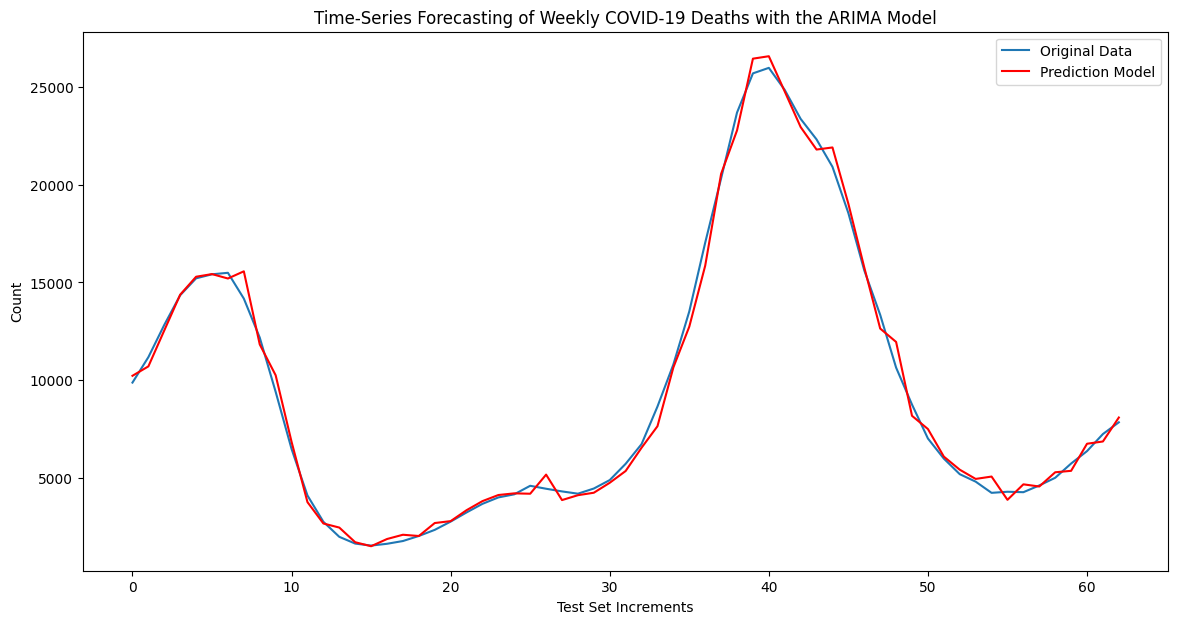

In [ ]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(14, 7))

plt.plot(test, label = 'Original Data')
plt.plot(predictions, color='red', label = 'Prediction Model')
plt.title('Time-Series Forecasting of Weekly COVID-19 Deaths with the ARIMA Model')
plt.xlabel('Test Set Increments')
plt.ylabel('Count')
plt.legend()
plt.show()

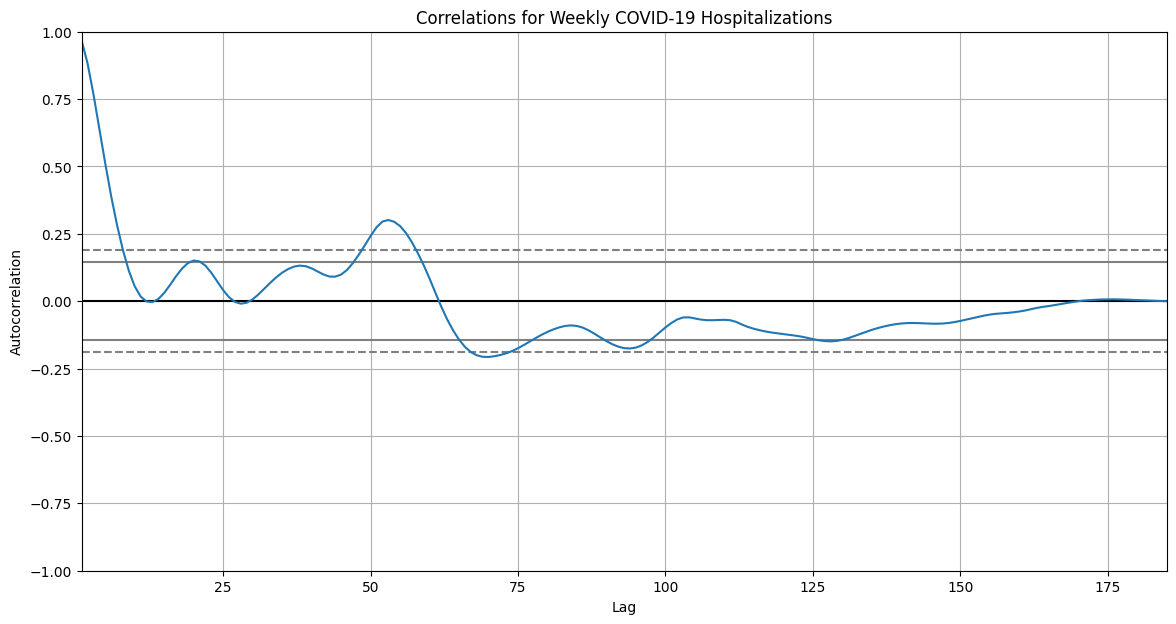

In [ ]:
# Time-Series Forecasting with weekly_hospital.csv

# 'AR' part of ARIMA
plt.figure(figsize=(14, 7))

autocorrelation_plot(df_merged['Weekly COVID-19 Hospital Admissions'])
plt.title('Correlations for Weekly COVID-19 Hospitalizations')
plt.show()
# between 0 - 13 --> positive correlation --> most drastic from 0 - approx. 13

In [ ]:
# second part of research question
model2 = ARIMA(df_merged['Weekly COVID-19 Hospital Admissions'], order=(13,1,1))
model_fit2 = model2.fit()

In [ ]:
# Summary of Fit Model
print(model_fit2.summary())

                                        SARIMAX Results                                        
Dep. Variable:     Weekly COVID-19 Hospital Admissions   No. Observations:                  185
Model:                                 ARIMA(13, 1, 1)   Log Likelihood               -1762.907
Date:                                 Tue, 19 Mar 2024   AIC                           3555.815
Time:                                         17:04:03   BIC                           3604.039
Sample:                                              0   HQIC                          3575.361
                                                 - 185                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5006      1.042      1.440      0.150      -0.542       3

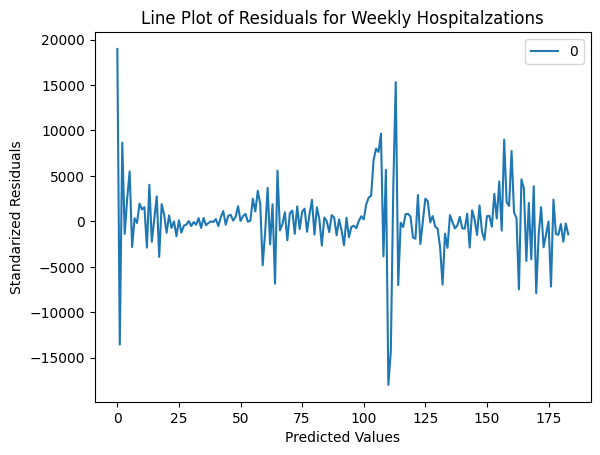

In [ ]:
# Line Plot of Residuals
residuals2 = DataFrame(model_fit2.resid)
residuals2.plot()
plt.title('Line Plot of Residuals for Weekly Hospitalzations')
plt.xlabel('Predicted Values')
plt.ylabel('Standarized Residuals')
plt.show()

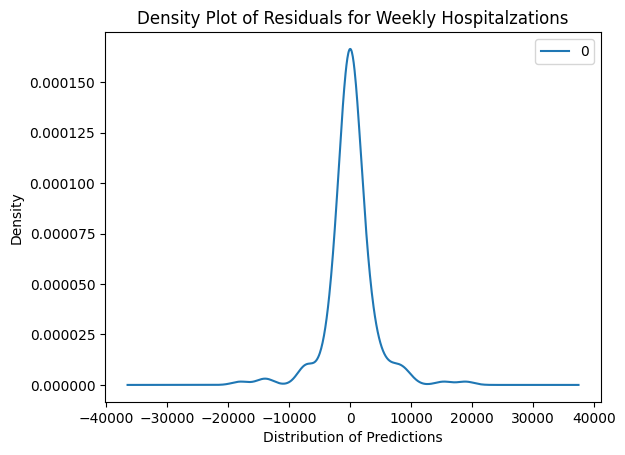

In [ ]:
# Density Plot of Residuals
residuals2.plot(kind='kde')
plt.title('Density Plot of Residuals for Weekly Hospitalzations')
plt.xlabel('Distribution of Predictions')
plt.show()
# errors are Gaussian, centered on zero

In [ ]:
# Summary Stats. of Residuals
print(residuals2.describe())

                  0
count    185.000000
mean     180.665017
std     3817.546464
min   -17601.494566
25%    -1014.045767
50%      115.954419
75%     1294.981723
max    18977.000000


In [ ]:
# Rolling Forecasting

# split into train and test sets
X2 = df_merged['Weekly COVID-19 Hospital Admissions'].values
size2 = int(len(X2) * 0.66)
train2, test2 = X2[0:size2], X2[size2:len(X2)]
history2 = [x for x in train2]
predictions2 = list()

In [ ]:
# Walk-forward Validation
for t in range(len(test2)):
 model2 = ARIMA(history2, order=(13,1,1))
 model_fit2 = model2.fit()
 output2 = model_fit2.forecast()
 yhat2 = output2[0]
 predictions2.append(yhat2)
 obs2 = test2[t]
 history2.append(obs2)
 print('predicted=%f, expected=%f' % (yhat2, obs2))

predicted=39855.093790, expected=44258.000000
predicted=54334.843553, expected=48686.000000
predicted=55676.605415, expected=53933.000000
predicted=60287.725323, expected=62563.000000
predicted=69833.813259, expected=72610.000000
predicted=79672.329276, expected=80157.000000
predicted=83116.710896, expected=84220.000000
predicted=86461.610720, expected=85775.000000
predicted=83592.712035, expected=84027.000000
predicted=81427.817659, expected=77614.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69137.656157, expected=63471.000000
predicted=49648.523282, expected=47712.000000
predicted=35486.486192, expected=32844.000000
predicted=23075.832014, expected=22686.000000
predicted=16703.748068, expected=16796.000000
predicted=16342.852626, expected=14071.000000
predicted=12416.588914, expected=12821.000000
predicted=14246.596122, expected=13221.000000
predicted=14983.598043, expected=14599.000000
predicted=18111.379645, expected=16351.000000
predicted=19154.622899, expected=20061.000000
predicted=26237.842266, expected=22649.000000
predicted=24348.581007, expected=25867.000000
predicted=31023.670434, expected=30257.000000
predicted=35010.068876, expected=33638.000000
predicted=35711.139104, expected=37253.000000
predicted=40498.413955, expected=39377.000000
predicted=40194.118351, expected=38301.000000
predicted=34296.043447, expected=35535.000000
predicted=34144.400932, expected=33916.000000
predicted=31877.576443, expected=32477.000000
predicted=31317.460535, expected=3

In [ ]:
# Evaluate Forecasts
rmse2 = sqrt(mean_squared_error(test2, predictions2))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 3384.334


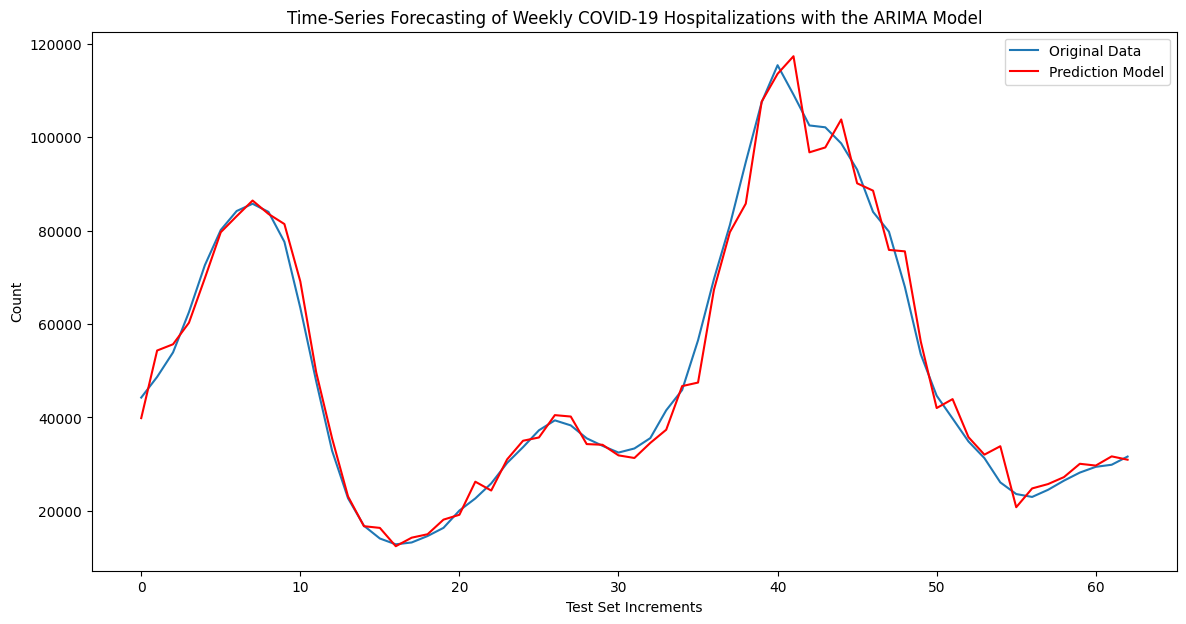

In [ ]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(14, 7))

plt.plot(test2, label = 'Original Data')
plt.plot(predictions2, color='red', label = 'Prediction Model')
plt.title('Time-Series Forecasting of Weekly COVID-19 Hospitalizations with the ARIMA Model')
plt.xlabel('Test Set Increments')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Model Accuracies:

# Ljung-Box Test
lbTest = sm.stats.acorr_ljungbox(residuals, lags=[1], boxpierce=False)
lbTest

,lb_stat,lb_pvalue
1,0.003796,0.950869


In [ ]:
lbTest2 = sm.stats.acorr_ljungbox(residuals2, lags=[1], boxpierce=False)
lbTest2

,lb_stat,lb_pvalue
1,3.044733,0.080999


In [ ]:
# Jarque-Bera Test
jbTest = sm.stats.stattools.jarque_bera(residuals)
print("JBTest:", jbTest)

JBTest: (array([96.2496491]), array([1.25792357e-21]), array([-0.17541797]), array([6.5161563]))


In [ ]:
jbTest2 = sm.stats.stattools.jarque_bera(residuals2)
print("JBTest2:", jbTest2)

JBTest2: (array([457.91940436]), array([3.66492224e-100]), array([0.09804227]), array([10.70501859]))


In [ ]:
# Interpreting Results:

# JB tests (normality test) have lower p values than LB tests (autocorrelation test)
# if p < a * 0.05, reject null hypothesis

# LB Test:
  # null hypothesis: no autocorrelation
  # not rejected for deaths or hospitalizations

# JB Test:
  # null hypothesis: data is normally distributed
  # rejected for both

# Overall Results:
  # The data is not normally distributed, as seen by the drastic peaks and troughs in the EDA plots.
  # The ARIMA model made an acceptable prediction only based on the JR test, not the LB test.

In [ ]:
# Sources:

  # Primary ARIMA resource: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

  # 2nd ARIMA resource: https://www.capitalone.com/tech/machine-learning/arima-model-time-series-forecasting/

  # 3rd ARIMA resource: https://www.kaggle.com/code/nholloway/deconstructing-arima

  # Ljung-Box and Jarque-Bera resource: https://github.com/statsmodels/statsmodels/issues/7349

  # Jarque-Bera documentation in statsmodels package: https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.jarque_bera.html